In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading dataset
dataset = pd.read_csv('iris_data.csv')


In [3]:
dataset.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
dataset['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

In [7]:
feature_cols = [ 'sepal.length','sepal.width','petal.length','petal.width' ]
X = dataset.iloc[:, 0:4].values
y= dataset.iloc[:, -1].values
feature_cols

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [8]:
X = (X - X.mean()) / (X.std())

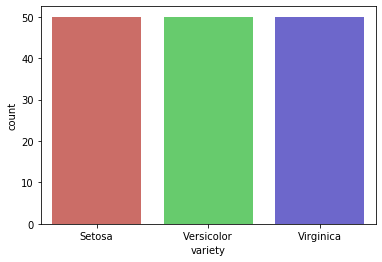

In [9]:
#plotting count graph
sns.countplot(x = 'variety', data = dataset, palette = 'hls')
plt.show()


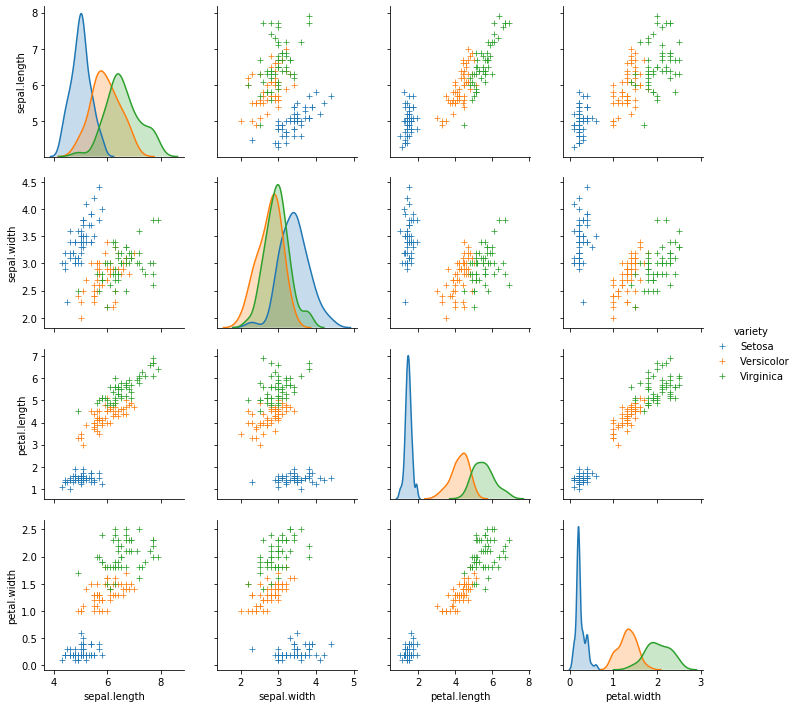

In [10]:

g = sns.pairplot(dataset, hue='variety', markers='+')
plt.show()

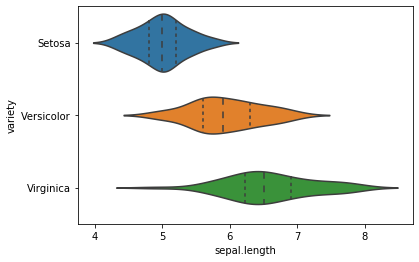

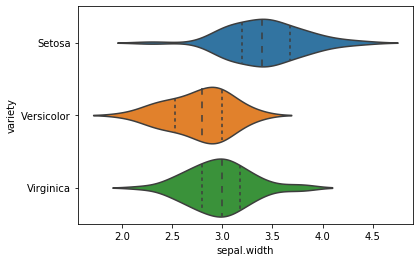

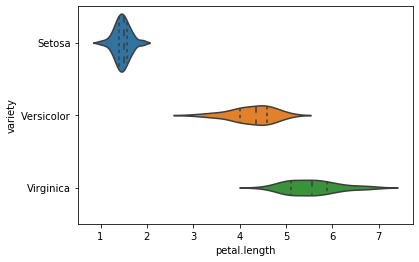

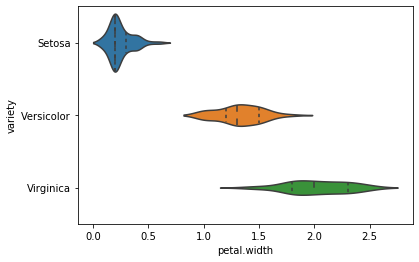

In [11]:
g = sns.violinplot(y='variety', x='sepal.length', data=dataset, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='sepal.width', data=dataset, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.length', data=dataset, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.width', data=dataset, inner='quartile')
plt.show()

In [14]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [17]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 5 ,min_samples_leaf = 1,
                                    random_state = 50)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Setosa']


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [20]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes = 2,min_samples_split = 10, random_state = 100)
classifier1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [21]:
y_pred = classifier.predict(X_test)
print(y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Setosa']


In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


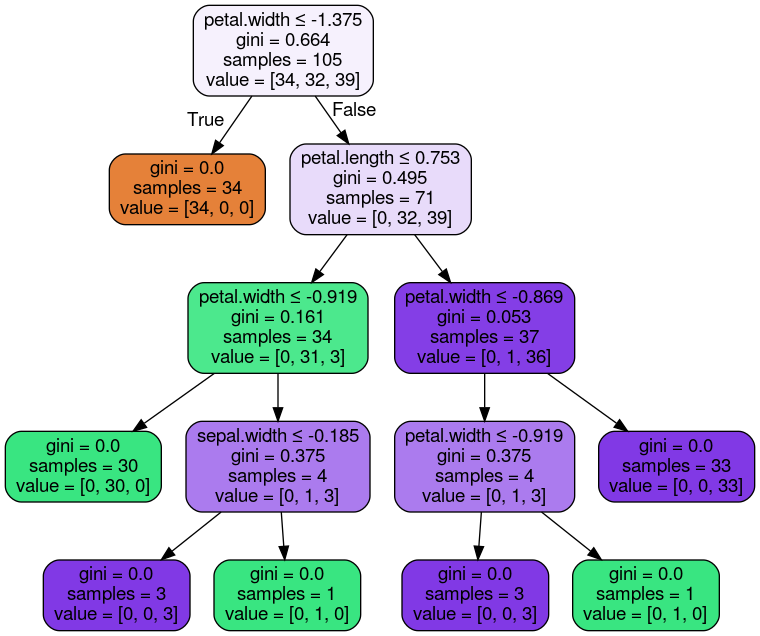

In [30]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('flower.png')
Image(graph.create_png())